--2019-05-19 22:59:25--  http://web.eecs.umich.edu/~fouhey/misc/grace_600.png
Resolving web.eecs.umich.edu (web.eecs.umich.edu)... 141.212.113.110
Connecting to web.eecs.umich.edu (web.eecs.umich.edu)|141.212.113.110|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121148 (118K) [image/png]
Saving to: ‘grace_600.png’

grace_600.png       100%[===================>] 118.31K  --.-KB/s    in 0.1s    

2019-05-19 22:59:25 (898 KB/s) - ‘grace_600.png’ saved [121148/121148]



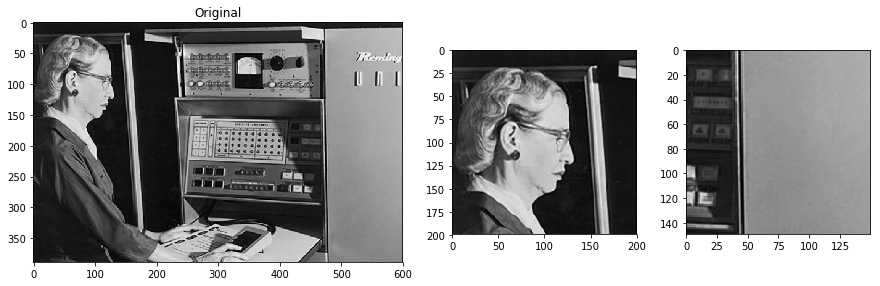

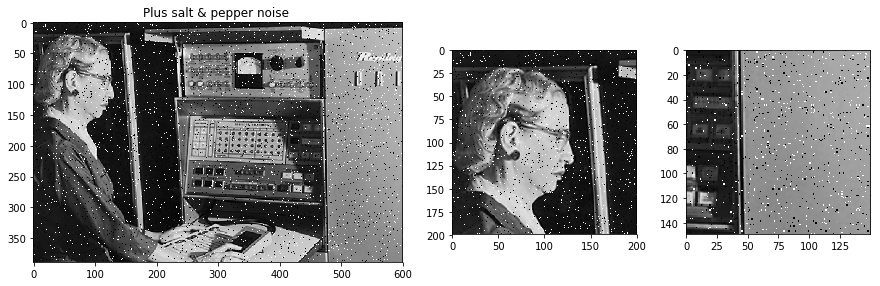

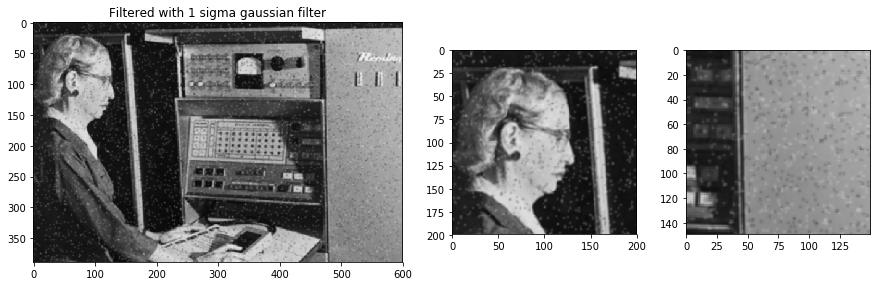

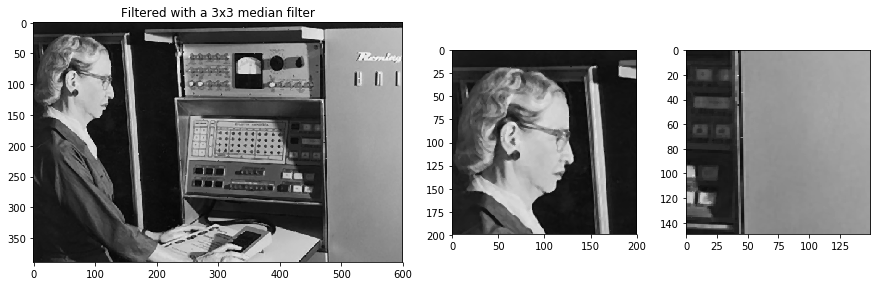

In [0]:
#David Fouhey
#Linear filtering
#UMich EECS 442 Fall 2019

from math import *
import numpy as np
import pdb
import os
import scipy.signal, scipy.misc
from PIL import Image
import matplotlib.pyplot as plt

#images are tiny otherwise
plt.rcParams['figure.figsize'] = [15, 15]

def ensuregrace():
  #ensure a copy of the grace hopper image is in the current directory
  if not os.path.exists("grace_600.png"):
    !wget http://web.eecs.umich.edu/~fouhey/misc/grace_600.png
    #If local, run this instead
    #os.system("wget http://web.eecs.umich.edu/~fouhey/misc/grace_600.png")
      
def filt(X,f,bound='symm'):
    return scipy.signal.convolve2d(X[:,:],f,boundary=bound,mode='same')      
     
def medfilt(X,s,bound='mirror'):
    return scipy.ndimage.median_filter(X,s,mode=bound)

def gauss(sig,supp):
  #make a gaussian filter with support supp and filter sigma sig
  F = np.zeros((supp,supp))
  #not the zero indexing; this is the center point
  cp = supp/2
  assert supp % 2 == 1
  for i in range(supp):
      for j in range(supp):
          #numerator of the gaussian
          num = (i-cp)**2.0+(j-cp)**2.0
          #exponentiate; no normalization since we have to do it later anyway
          F[i,j] = exp(-num / (2*(sig**2)))
  #normalize          
  F = F / np.sum(F)
  return F

def sharpen(X,factor):
  #X - smoothed X
  sharpToAdd = X - filt(X,gauss(0.5,3))
  return np.clip(X+factor*sharpToAdd,0,255)

def showGrace(X,title=None):
  #fig = plt.figure(figsize=(50, 50))
  
  f, (w1, w2, w3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [2, 1, 1]})
  #show image and two closeups; 
  w1.imshow(X,cmap='gray',vmin=0,vmax=255)
  if title is not None:
    w1.set_title(title)
  w2.imshow(X[:200,:200],cmap='gray',vmin=0,vmax=255)
  w3.imshow(X[150:300,430:580],cmap='gray',vmin=0,vmax=255)
  f.show()

if __name__ == "__main__":
  
  ensuregrace()
  #load the image 
  X = np.array(Image.open("grace_600.png").convert('L')).astype(np.float)
  
  gaussF = gauss(1,1*6+1)
  
  option = "spnoise"
  
  if option == "gaussnoise":
    #add and remove gaussian noise
    showGrace(X,title="Original")
  
    XNoise = X+np.random.normal(size=X.shape)*12
    showGrace(XNoise,title="Plus ~5% Gaussian Noise")
 
    XNoiseFilt = filt(XNoise,gaussF)
    showGrace(XNoiseFilt,title="Filtered with 1 sigma gaussian filter")

  elif option == "spnoise":
    #add and remove salt and pepper noise
    showGrace(X,title="Original")
    
    XSNoise = X.copy()
    M = np.random.uniform(size=X.shape)
    XSNoise[M<0.02] = 0; XSNoise[M>0.98] = 255
    showGrace(XSNoise,title="Plus salt & pepper noise ")

    XSNoiseGFilt = filt(XSNoise,gaussF)
    showGrace(XSNoiseGFilt,title="Filtered with 1 sigma gaussian filter")

    XSNoiseMFilt = medfilt(XSNoise,3)
    showGrace(XSNoiseMFilt,title="Filtered with a 3x3 median filter")
  
  elif option == "sharpen":
    #sharpen stuff    
    showGrace(X,title="Original")
    for s in [1,2,4,8]:
      showGrace(sharpen(X,s),title="+%d sharp" % s)
    
    
  elif option == "blurblur":
    #repeatedly blur things
    showGrace(X,title="Original")
    for s in [1,2,4,8]:
      showGrace(filt(X,gauss(s,s*6+1)),title="%d sigma gaussian filter" % s)
    
  
  
  
  
 

  
